# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

2024-08-13 21:10:25.324485: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 21:10:25.333707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 21:10:25.346655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 21:10:25.350174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 21:10:25.361370: I tensorflow/core/platform/cpu_feature_guar

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [4]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [6]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

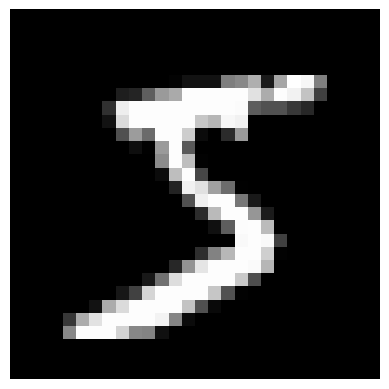

In [7]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

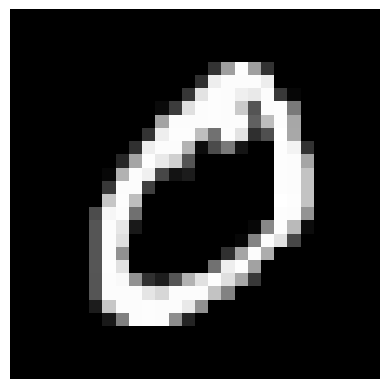

In [8]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

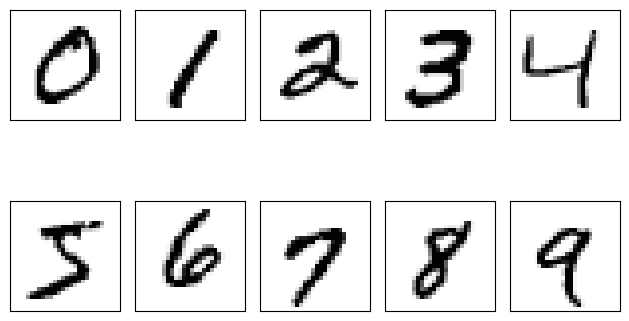

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

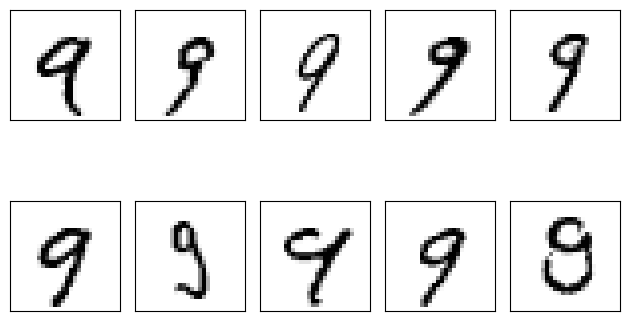

In [10]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [11]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [13]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [15]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


I0000 00:00:1723551128.644991   24865 service.cc:146] XLA service 0x7f623c009590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723551128.645038   24865 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-13 20:12:08.672402: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-13 20:12:08.777907: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  33/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3554 - loss: 1.9719

I0000 00:00:1723551129.745880   24865 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8449 - loss: 0.5340 - val_accuracy: 0.9551 - val_loss: 0.1622
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9523 - loss: 0.1641 - val_accuracy: 0.9670 - val_loss: 0.1188
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9629 - loss: 0.1223 - val_accuracy: 0.9691 - val_loss: 0.1030
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9725 - loss: 0.0908 - val_accuracy: 0.9689 - val_loss: 0.1006
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9776 - loss: 0.0760 - val_accuracy: 0.9738 - val_loss: 0.0875


In [14]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

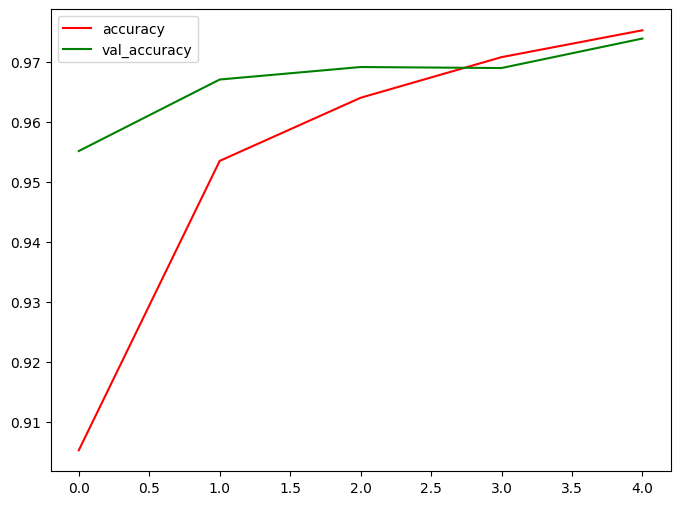

In [16]:
# 對訓練過程的準確率繪圖
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='val_accuracy')
plt.legend()

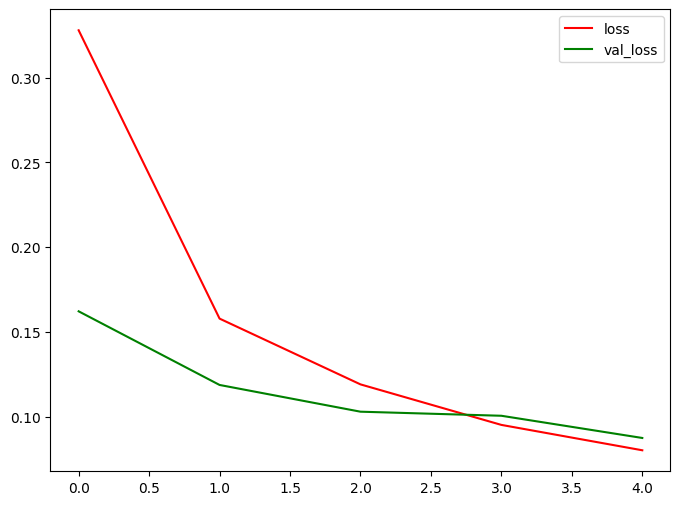

In [17]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='loss')
plt.plot(history.history['val_loss'], 'g', label='val_loss')
plt.legend()

## 步驟7：評分(Score Model)

In [18]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0810
compile_metrics: 0.9764


In [19]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [20]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
0~9預測機率: [[0.   0.   0.   0.   0.   0.15 0.84 0.   0.   0.  ]]


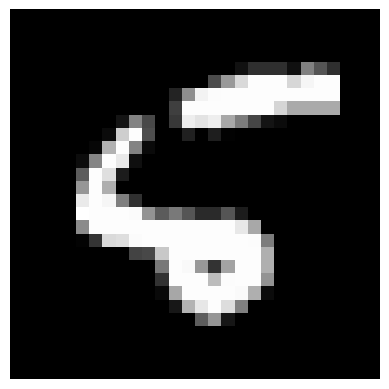

In [21]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [22]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

## 步驟10：新資料預測

In [24]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/9.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

(280, 280)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[7]


In [25]:
model.predict(X1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[4.9230657e-03, 4.4858188e-04, 1.5412838e-02, 1.0436214e-02,
        1.0083490e-03, 4.2370730e-03, 1.0282839e-05, 8.0640119e-01,
        2.1242535e-02, 1.3587981e-01]], dtype=float32)

In [26]:
np.sum(model.predict(X1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


1.0

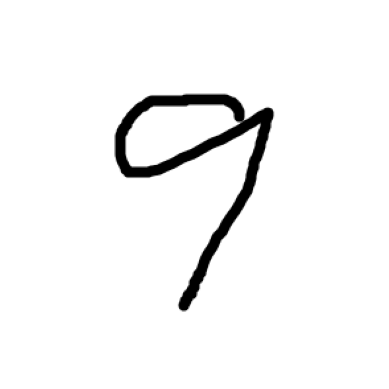

In [27]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

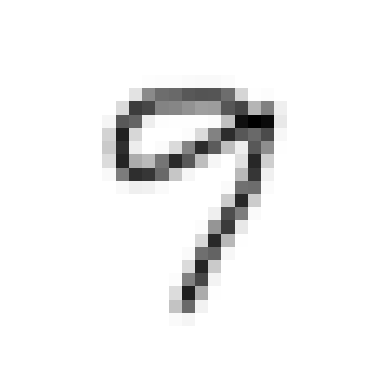

In [28]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [29]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1), axis=-1)
    print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[7]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [30]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [31]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,970,0,0,0,1,1,4,1,2,1
1,0,1127,3,0,0,1,1,0,3,0
2,3,1,1002,6,3,0,2,9,5,1
3,0,0,3,979,0,11,0,8,3,6
4,0,0,3,0,957,0,4,3,2,13
5,2,0,0,5,1,868,6,3,4,3
6,5,3,0,1,3,7,935,1,3,0
7,0,2,6,2,0,1,0,1009,1,7
8,7,2,1,3,4,6,2,6,941,2
